# $ \text{Anders Gartenberg}$

# $ \text{Project 5: Epidemic}$

# $ \text{November 14, 2020}$

## $ \text{Introduction}$

Infectious diseases are typically spread through the direct transfer of bacteria from one person to another. This can happen from airborne bacteria, through direct contact with an infected person, or by exchange of bodily fluids. In this project, our world is a $200 \times 200$ grid and we are interested in modeling the spread of an arbitrary disease, with $16$ initially infected cells ($4 \times 4$ square) in the middle of our grid. Each cell has a numerical value, i.e. $0$ corresponds to a healthy person, $1$ corresponds to a sick person, and $2$ corresponds to a recovered person (sick but now healed). 

This project will be centered around two main parameters that will essentially determine how the infection spreads: $p_I$ and $p_R$. $p_I$ will represent the probability of a cell infecting a healthy neighboring cell and $p_R$ will represent the probability of a sick cell becoming healthy, or recovering the next day. If $k$ represents the number of sick neighbors in a given cell, then $(1-p_I)^k$ represents the probability of not getting sick. We want it to be the case that the larger the number of sick neighbors, the larger the probability of infection, and our equation accounts for this by doing $(1-p_I)^k$ as opposed to just $(p_I)^k$. We want the probability of getting sick, so our resulting equation is then $1-(1-p_I)^k$.

As mentioned previously, our first step is to create a $200 \times 200$ grid and put $16$ initially infected cells in the center of it. Next, we want to loop cell by cell and determine $p_S$ or $p_R$, $p_S$ being equal to our equation $1-(1-p_I)^k$. We then want to test for infected or recovery ($p_S$ or $p_R$) and we will call this $p_*$. We will pick $R$ in $[0,1]$ randomly since it is a probability, and the test succeeds when $p_*>R$. The last step is to just update cell by cell. One big assumption we will be making throughout this project is that if a cell is recovered, it will not get sick again. 

The main goals of this project are to create an `epidemic` function that will take the given $200 \times 200$ grid setup and return the state of all the cells in the next days, explore what changing the parameters $p_I$ and $p_R$ will do to the overall state of the cells, and the last goal is to explore what vaccinating a certain percentage of the population will do. Vaccinated cells will be associated with the value $-1$ and they will never get sick.

## $\text{Content}$

We will start by creating the "canvas" which we will work on. This includes a $202 \times 202$ grid (to account for the neighboring cells of edge and corner cells), and the $4 \times 4$ square of infected cells in the center of the grid.

In [1]:
import numpy as np # importing all the necessary modules to make the plotting, animation, and the rest of the code work
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import colors
import random
cmap = colors.ListedColormap(['palegreen', 'green', 'black', 'orange'])

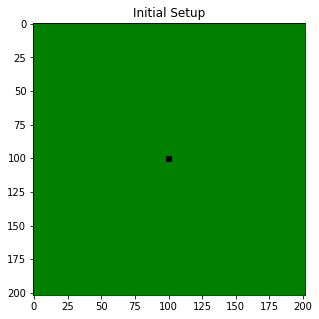

In [2]:
x=np.zeros((202,202)) # making a 202 x 202 grid
x[99:103,99:103]=1 # making a 4 x 4 grid in the center of the larger grid
plt.figure(figsize=(5,5))
plt.title("Initial Setup")
plt.imshow(x, cmap=cmap, vmin=-1, vmax=2)
plt.show()

We will then make our `epidemic` function which takes the setup from above and returns the states of the cells over the next given number of days.

In [3]:
def epidemic(x,pi,pr): # pi is prob of infection, pr is prob of recovery
    y=x.copy() # y is a copy of our initial 202 x 202 grid
    for l in range(1,201): # looping through the range of 1 to 201
        for m in range(1,201): # nested for loop
            if x[l,m]==0: # if the cell is healthy
                sumx=x[l-1:l+2,m-1:m+2] # checking neighboring cells
                a=sumx==1
                s=sumx[a].sum() # sum of neighboring infected cells
                psick=1-(1-pi)**s # using our equation for the prob of a healty cell getting infected
                p=random.random()
                
                if p<psick: # if randomly picked number in [0,1] is less than prob of getting sick, cell becomes sick
                    y[l,m]=1
                    
            if x[l,m]==1: # if the cell in question is sick:
                precov=random.random() 
                if precov<pr: # if randomly picked number in [0,1] is less than prob of recovery, cell recovers from being sick
                    y[l][m]=2
    return y

## $\text{Exploration}$

Now that we have our `epidemic` function up and running, we can explore what different values for the parameters $p_I$ and $p_r$ make the plot look like.

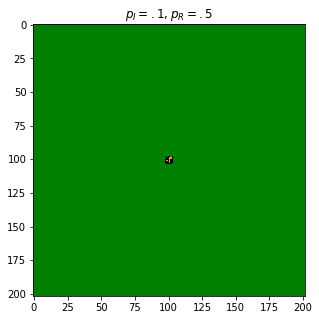

In [4]:
x=epidemic(x,.5,.5)
plt.figure(figsize=(5,5))
plt.title('$p_I=.1,p_R=.5$')
plt.imshow(x,cmap=cmap,vmin=-1,vmax=2)
plt.show()

Low infection rate, medium recovery rate produces a small plot.

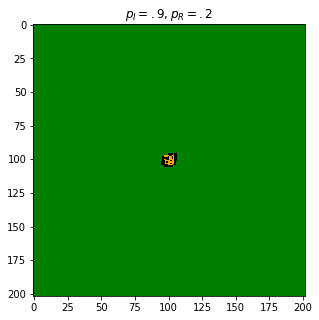

In [7]:
x=epidemic(x,.9,.2)
plt.figure(figsize=(5,5))
plt.title('$p_I=.9,p_R=.2$')
plt.imshow(x,cmap=cmap,vmin=-1,vmax=2)
plt.show()

High infection rate, low recovery rate produces a medium sized plot

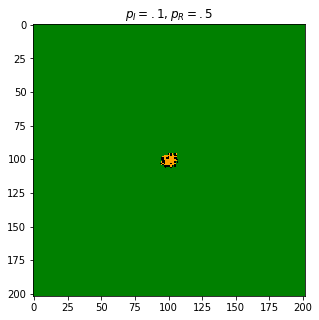

In [8]:
x=epidemic(x,.1,.5)
plt.figure(figsize=(5,5))
plt.title('$p_I=.1,p_R=.5$')
plt.imshow(x,cmap=cmap,vmin=-1,vmax=2)
plt.show()

Low infection rate, medium recovery rate produces a small plot.

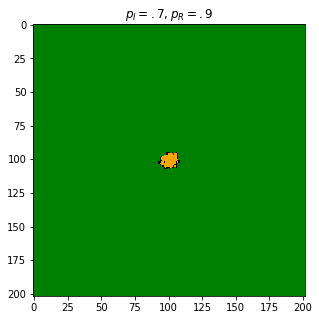

In [9]:
x=epidemic(x,.7,.9)
plt.figure(figsize=(5,5))
plt.title('$p_I=.7,p_R=.9$')
plt.imshow(x,cmap=cmap,vmin=-1,vmax=2)
plt.show()

High infection rate, high recovery rate produces a very large plot.

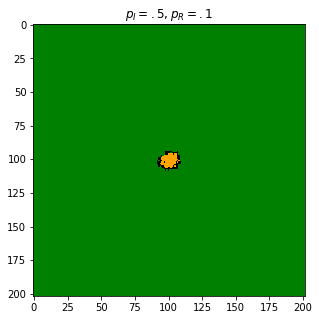

In [10]:
x=epidemic(x,.5,.1)
plt.figure(figsize=(5,5))
plt.title('$p_I=.5,p_R=.1$')
plt.imshow(x,cmap=cmap,vmin=-1,vmax=2)
plt.show()

Medium infection rate, small recovery rate produces a medium plot.

## $\text{Animations}$

Next, we will use the given animation code and incorporate the `epidemic` function into it to run the simulation of what the model will look like over several days.

<IPython.core.display.Javascript object>


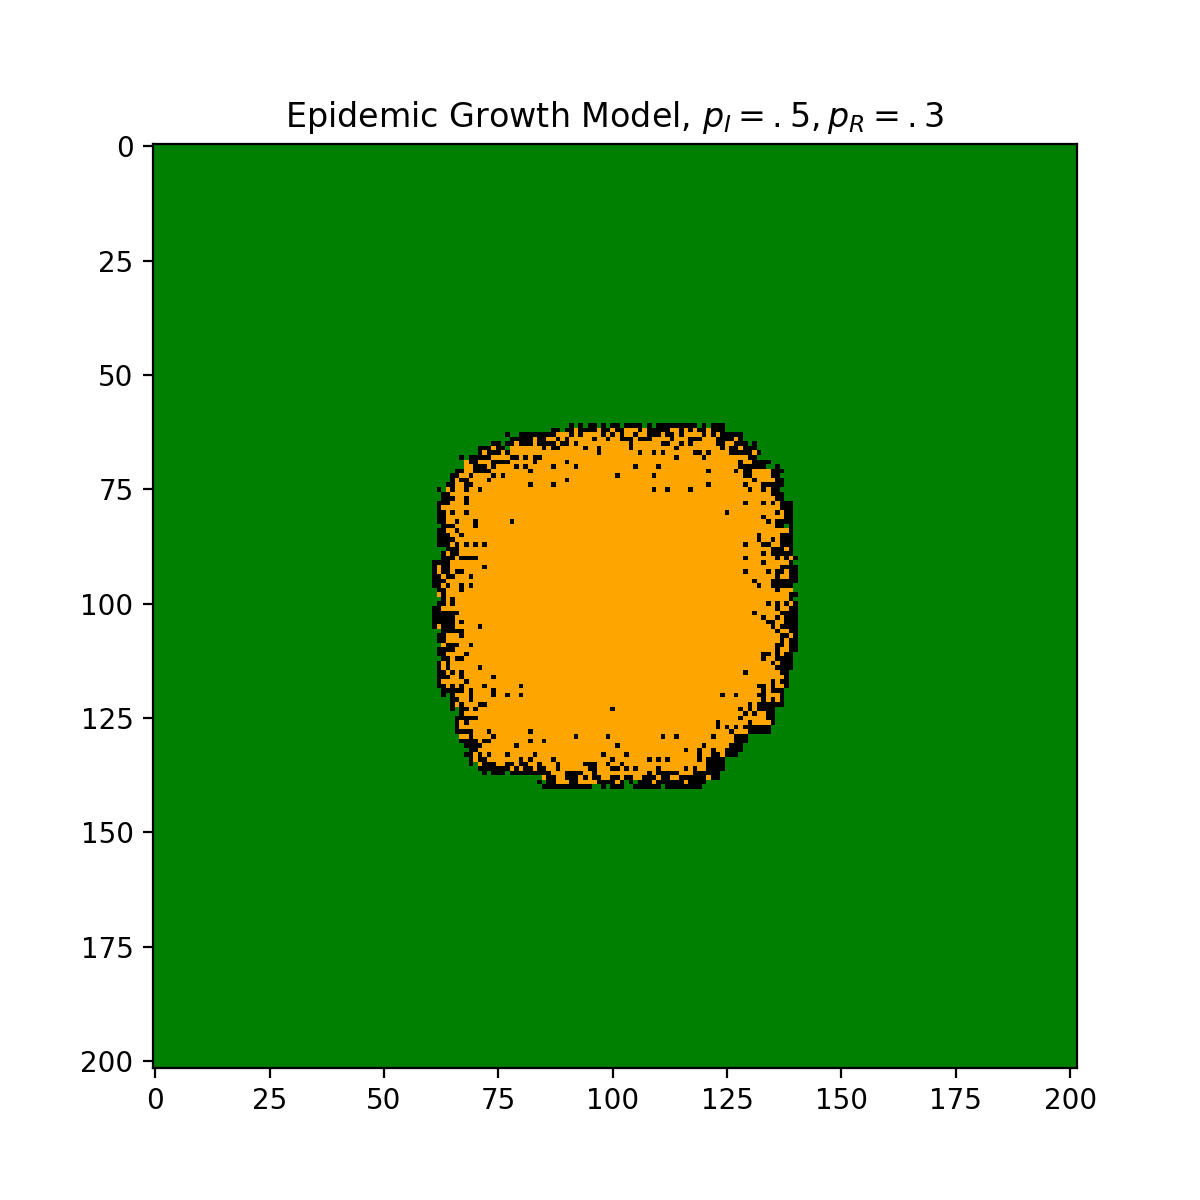

In [11]:
%matplotlib notebook

x = np.zeros((202,202), dtype = int)
x[99:103,99:103]=1
fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Epidemic Growth Model, $p_I=.5, p_R=.3$")
cmap = colors.ListedColormap(['palegreen', 'green', 'black', 'orange'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def animate(i):
    global x

    x=epidemic(x,pi=.5,pr=.3) # incorporating our epidemic function into the animation code
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=animate,  interval=300, blit=True, repeat=False)
plt.show()

$p_I=.5, p_R=.3$ produces an animation with slow, predictable spread.

Traceback (most recent call last):
  File "C:\Users\AEG00\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\AEG00\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


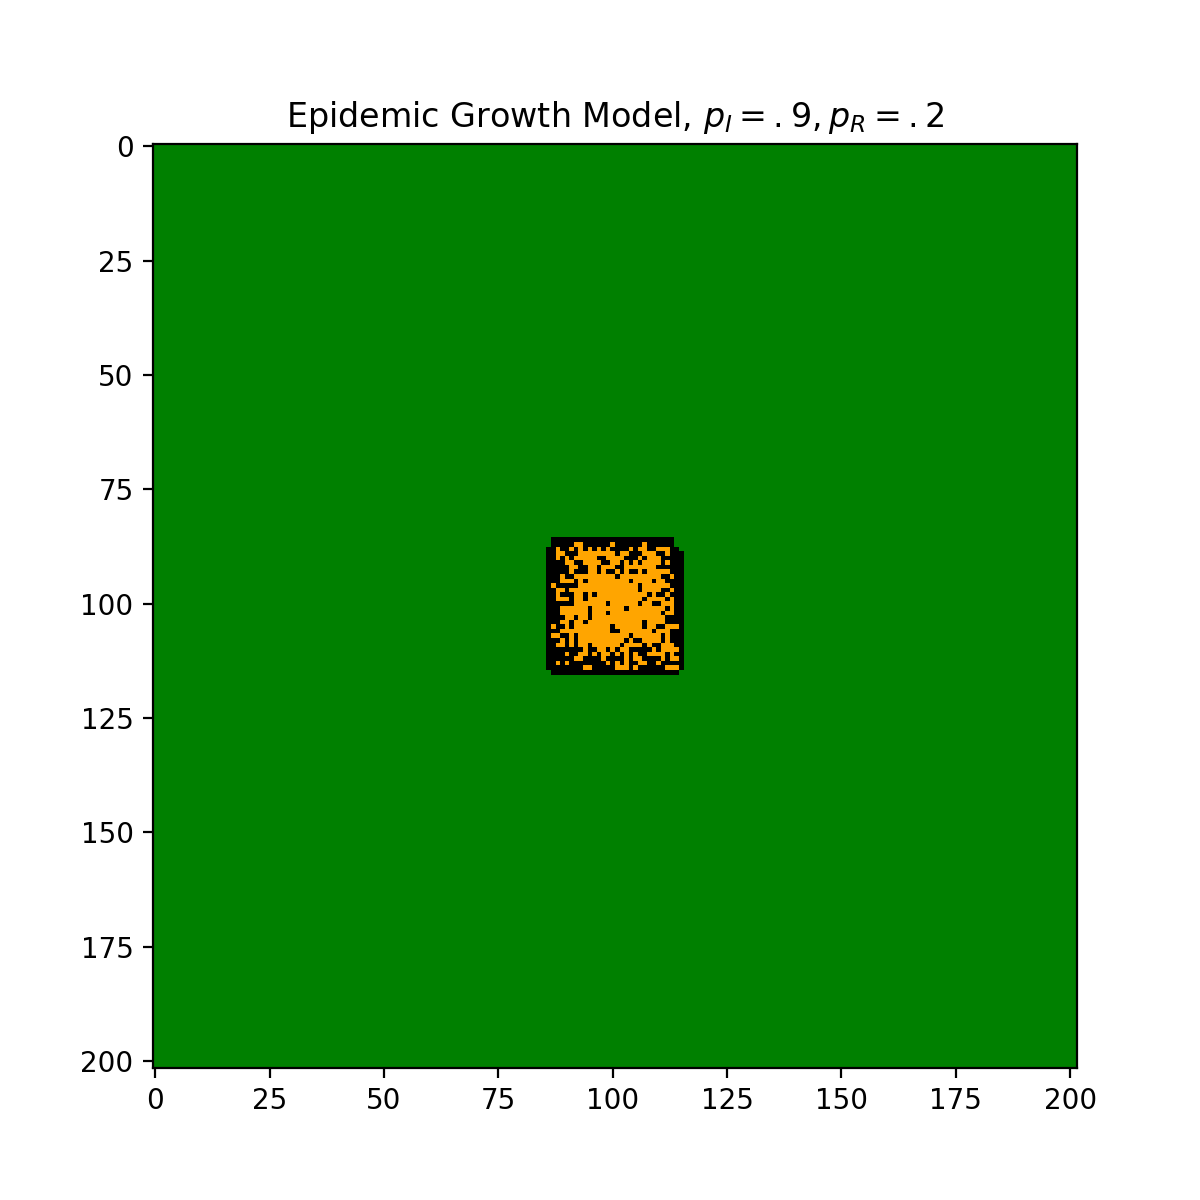

In [12]:
%matplotlib notebook

x = np.zeros((202,202), dtype = int)
x[99:103,99:103]=1
fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Epidemic Growth Model, $p_I=.9, p_R=.2$")
cmap = colors.ListedColormap(['palegreen', 'green', 'black', 'orange'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def animate(i):
    global x

    x=epidemic(x,pi=.9,pr=.2)
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=animate,  interval=300, blit=True, repeat=False)
plt.show()

$p_I=.9, p_R=.2$ produces an animation which spreads slowly and steadily, however the spread appears to be in the shape of a square.

Traceback (most recent call last):
  File "C:\Users\AEG00\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\AEG00\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


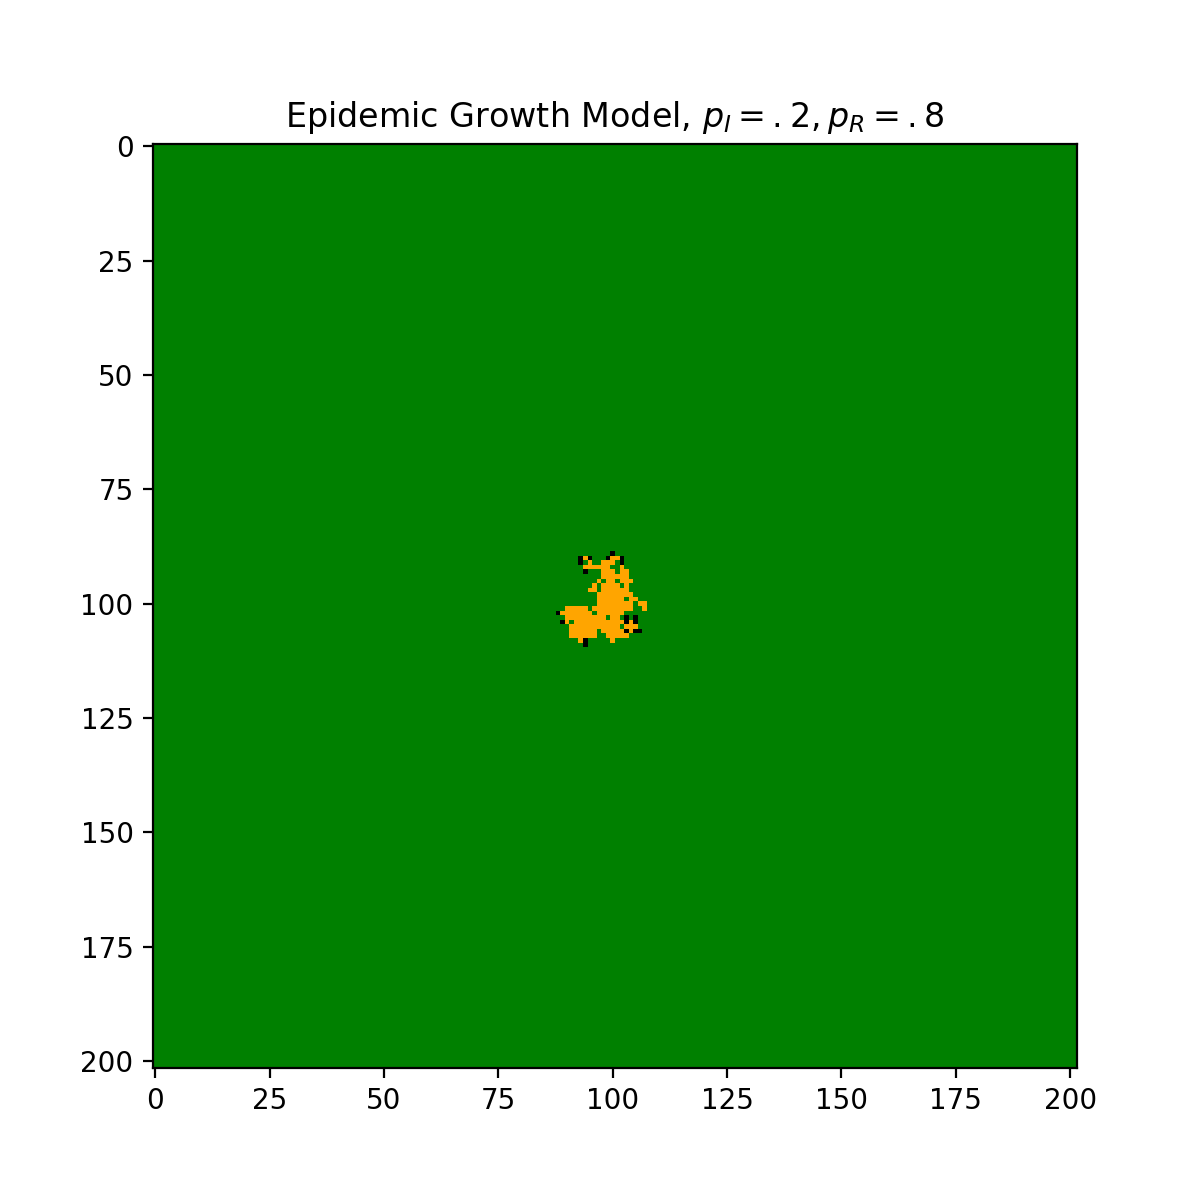

In [13]:
%matplotlib notebook

x = np.zeros((202,202), dtype = int)
x[99:103,99:103]=1
fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Epidemic Growth Model, $p_I=.2, p_R=.8$")
cmap = colors.ListedColormap(['palegreen', 'green', 'black', 'orange'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def animate(i):
    global x

    x=epidemic(x,pi=.2,pr=.8)
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=animate,  interval=300, blit=True, repeat=False)
plt.show()

$p_I=.2, p_R=.8$ produces a very unique and interesting animation, as the spread becomes very unpredictable and appears to go all over the place. The low infection rate means that the entire grid does not even get completely filled - the infection dies off at some point.

Traceback (most recent call last):
  File "C:\Users\AEG00\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\AEG00\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


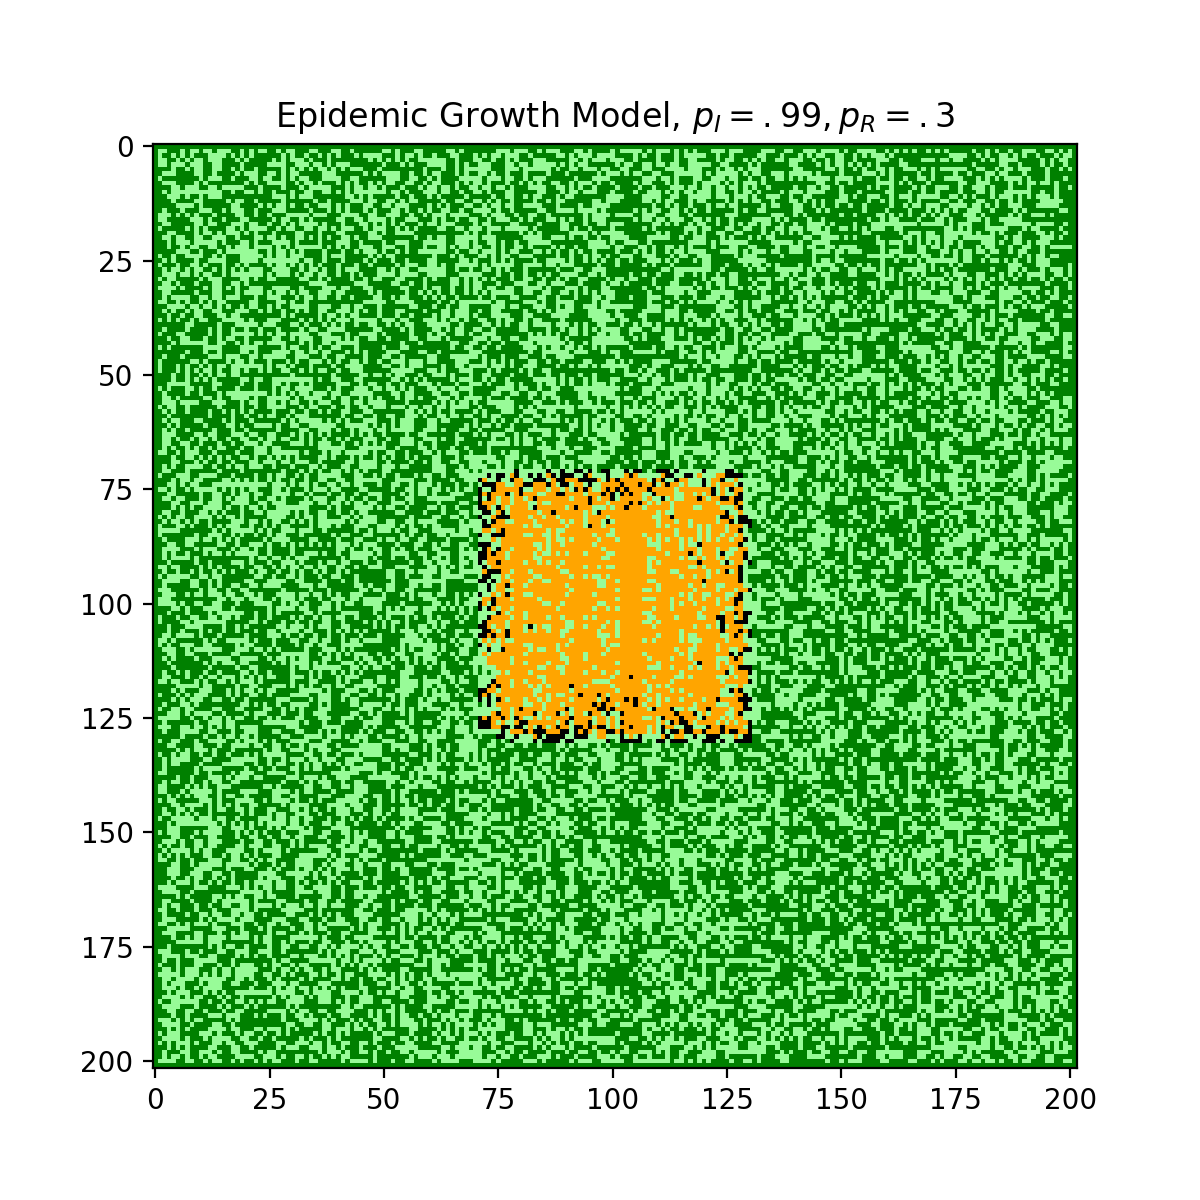

In [14]:
%matplotlib notebook

x = np.zeros((202,202), dtype = int)
x[99:103,99:103]=1
fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Epidemic Growth Model, $p_I=.99, p_R=.3$")
cmap = colors.ListedColormap(['palegreen', 'green', 'black', 'orange'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def animate(i):
    global x

    x=epidemic(x,pi=.99,pr=.3)
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=animate,  interval=300, blit=True, repeat=False)
plt.show()

$p_I=.99, p_R=.5$ also produces an animation with a very "square" spread. An interesting observation is that it appears as though a higher $p_I$ produces a more "square" spread of the disease.

To take this a step further, we can make a function `epdays` which will take a number of days, $p_I$ and $p_R$, and return for us the number of vaccinated, healthy, infected, and recovered cells over however many days we assign it to.

In [15]:
def epdays(days,pi,pr): # defining the function
    x=np.zeros((202,202)) # grid of 202 x 202 zeros
    x[99:103,99:103]=1 # 4 x 4 square in the center of the grid
    n=x.copy # making n a copy of the grid
    myl1=[]
    myl2=[]
    myl3=[]
    myl4=[]
    for l in range(1,days+1): # looping through 1 to however many days we assign the function
        g=epidemic(x,pi,pr) # g equals our epidemic function
        n=g
        a=(n==-1) # vaccinated cells
        b=(n==1) # infected cells
        c=(n==0) # healthy cells
        d=(n==2) # recovered cells
        myl1.append(n[a].shape[0]) # adding each corresponding type of cell to the empty list
        myl2.append(n[b].shape[0])
        myl3.append(n[c].shape[0])
        myl4.append(n[d].shape[0])
        
    return myl1,myl2,myl3,myl4

In [16]:
epdays(6,.2,.8) # testing the epdays function

([0, 0, 0, 0, 0, 0],
 [12, 15, 13, 14, 9, 9],
 [40779, 40776, 40777, 40778, 40780, 40779],
 [13, 13, 14, 12, 15, 16])

In [17]:
epdays(10,.5,.5)

([0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [21, 23, 21, 26, 23, 23, 27, 26, 25, 25],
 [40776, 40771, 40773, 40772, 40772, 40771, 40770, 40771, 40771, 40772],
 [7, 10, 10, 6, 9, 10, 7, 7, 8, 7])

## $\text{Vaccine}$

Our final step is to create a vaccine, and we will assign the vaccinated cells with the value of $-1$. We also want to explore how the disease will spread with a certain number of cells vaccinated at the beginning of the spread. Vaccinated cells will show up as pale green on the plots.

<IPython.core.display.Javascript object>


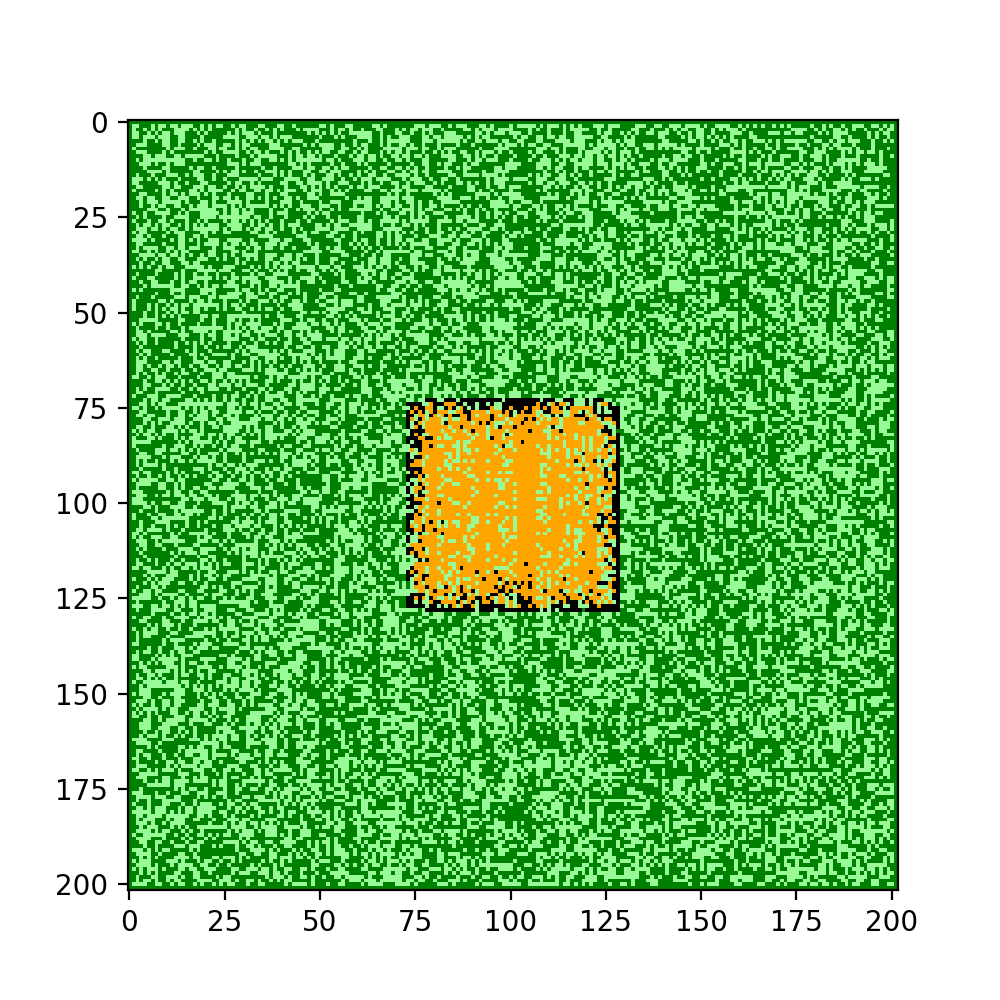

In [18]:
for l in range(1,201): # looping through the range of 1 to 201
    for m in range(1,201): # nested for loop
        if x[1,m]==0: # if the cell is healthy
            pvacc=.3 # prob of cell getting vaccinated
            r=random.random()
            if pvacc>r: # if pvacc greater than random number in [0,1], cell becomes vaccinated
                x[l,m]=-1
plt.figure(figsize=(5,5))
plt.imshow(x,cmap=cmap,vmin=-1,vmax=2)
plt.show()

Let's make the vaccine code into a function so we can put it in the animation.

In [19]:
def vaccp(v,x):
    for l in range(1,201): # looping through the range of 1 to 201
        for m in range(1,201): # nested for loop
            if x[l,m]==0: # if the cell is healthy
                pvacc=v # prob of cell getting vaccinated
                r=random.random()
                if pvacc>r: # if pvacc greater than random number in [0,1], cell becomes vaccinated
                    x[l,m]=-1
    plt.imshow(x,cmap=cmap,vmin=-1,vmax=2)
    plt.show()
    return x

In [20]:
vaccp(.3,x)

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0, -1, -1, ...,  0, -1,  0],
       [ 0, -1,  0, ..., -1, -1,  0],
       ...,
       [ 0,  0, -1, ...,  0,  0,  0],
       [ 0, -1, -1, ..., -1, -1,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

Traceback (most recent call last):
  File "C:\Users\AEG00\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\AEG00\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


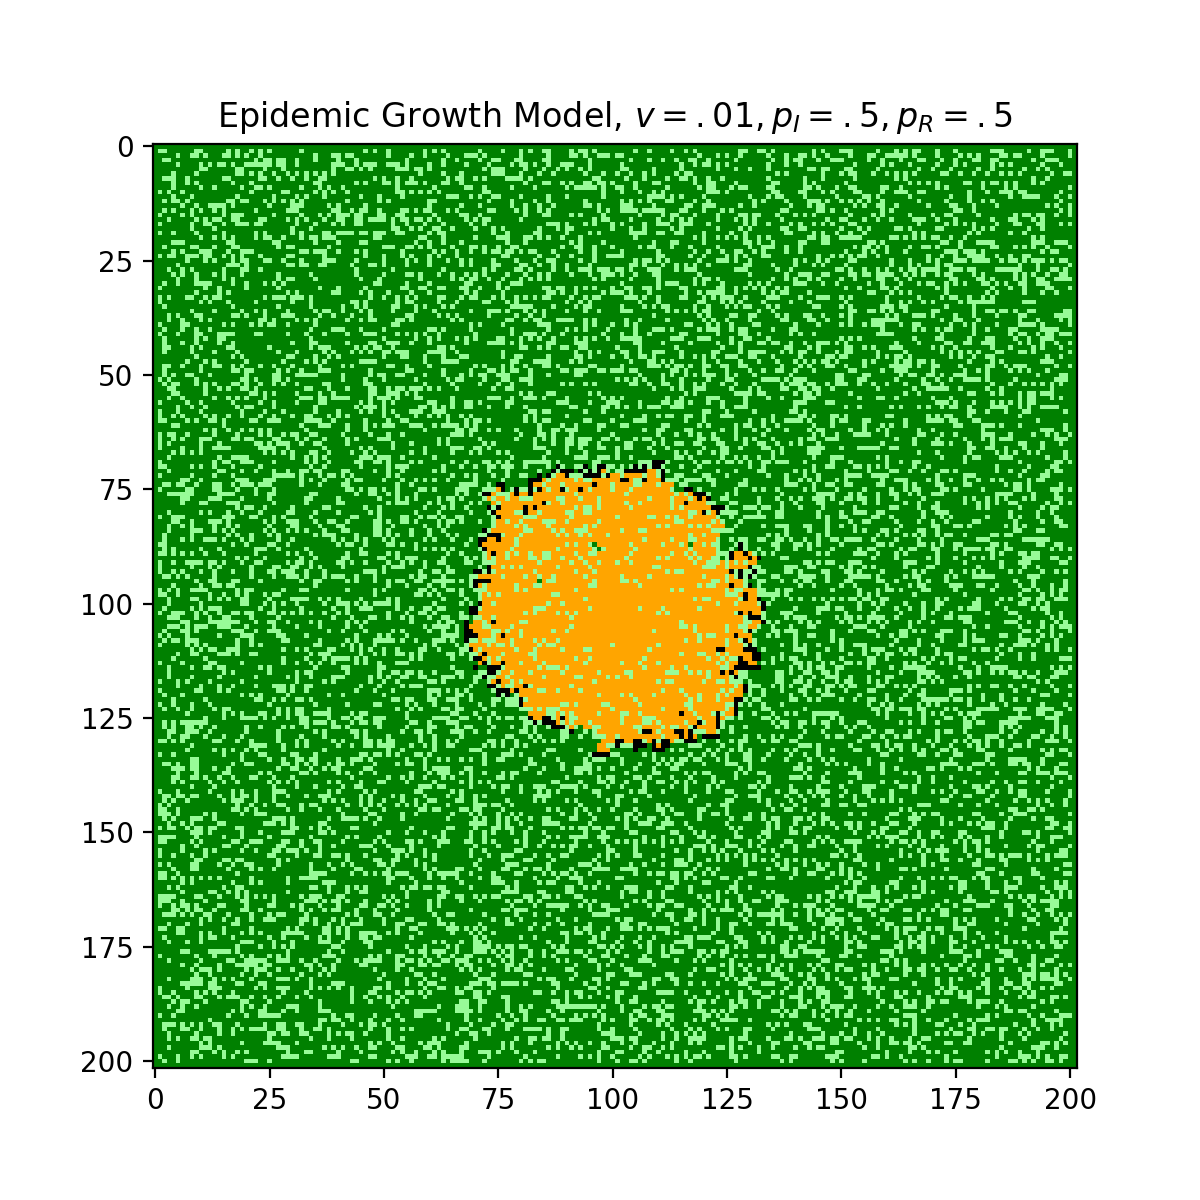

In [21]:
%matplotlib notebook

x = np.zeros((202,202), dtype = int)
x[99:103,99:103]=1
fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Epidemic Growth Model, $v=.01, p_I=.5, p_R=.5$")
cmap = colors.ListedColormap(['palegreen', 'green', 'black', 'orange'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def animate(i):
    global x

    x=vaccp(.01,x) # incorporating the vaccine function
    x=epidemic(x,pi=.5,pr=.5) # incorporating our epidemic function into the animation code
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=animate,  interval=300, blit=True, repeat=False)
plt.show()

With a low $v$ value of .01, we can of course expect a slow growth in the number of vaccinated cells each day. This drastically slows the spread of the disease in the grid.

Traceback (most recent call last):
  File "C:\Users\AEG00\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\AEG00\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


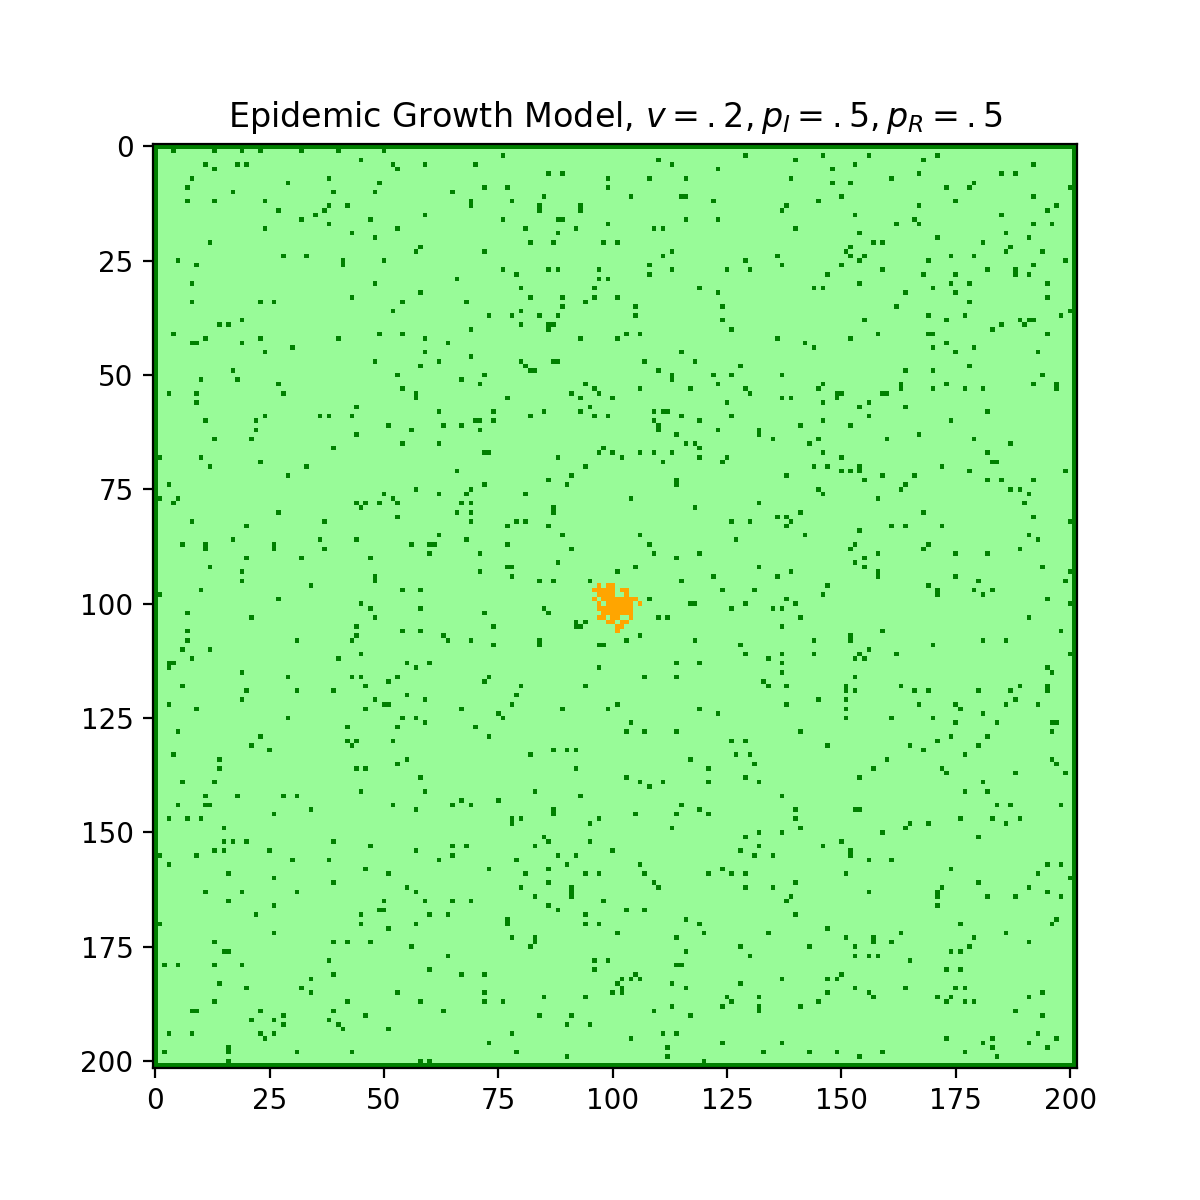

In [22]:
%matplotlib notebook

x = np.zeros((202,202), dtype = int)
x[99:103,99:103]=1
fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Epidemic Growth Model, $v=.2, p_I=.5, p_R=.5$")
cmap = colors.ListedColormap(['palegreen', 'green', 'black', 'orange'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def animate(i):
    global x

    x=vaccp(.2,x) # incorporating the vaccine function
    x=epidemic(x,pi=.5,pr=.5) # incorporating our epidemic function into the animation code
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=animate,  interval=300, blit=True, repeat=False)
plt.show()

With a higher $v$ value of .2, the number of vaccinated cells increases very quickly day by day and the infection dies out pretty quickly.

Traceback (most recent call last):
  File "C:\Users\AEG00\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\AEG00\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


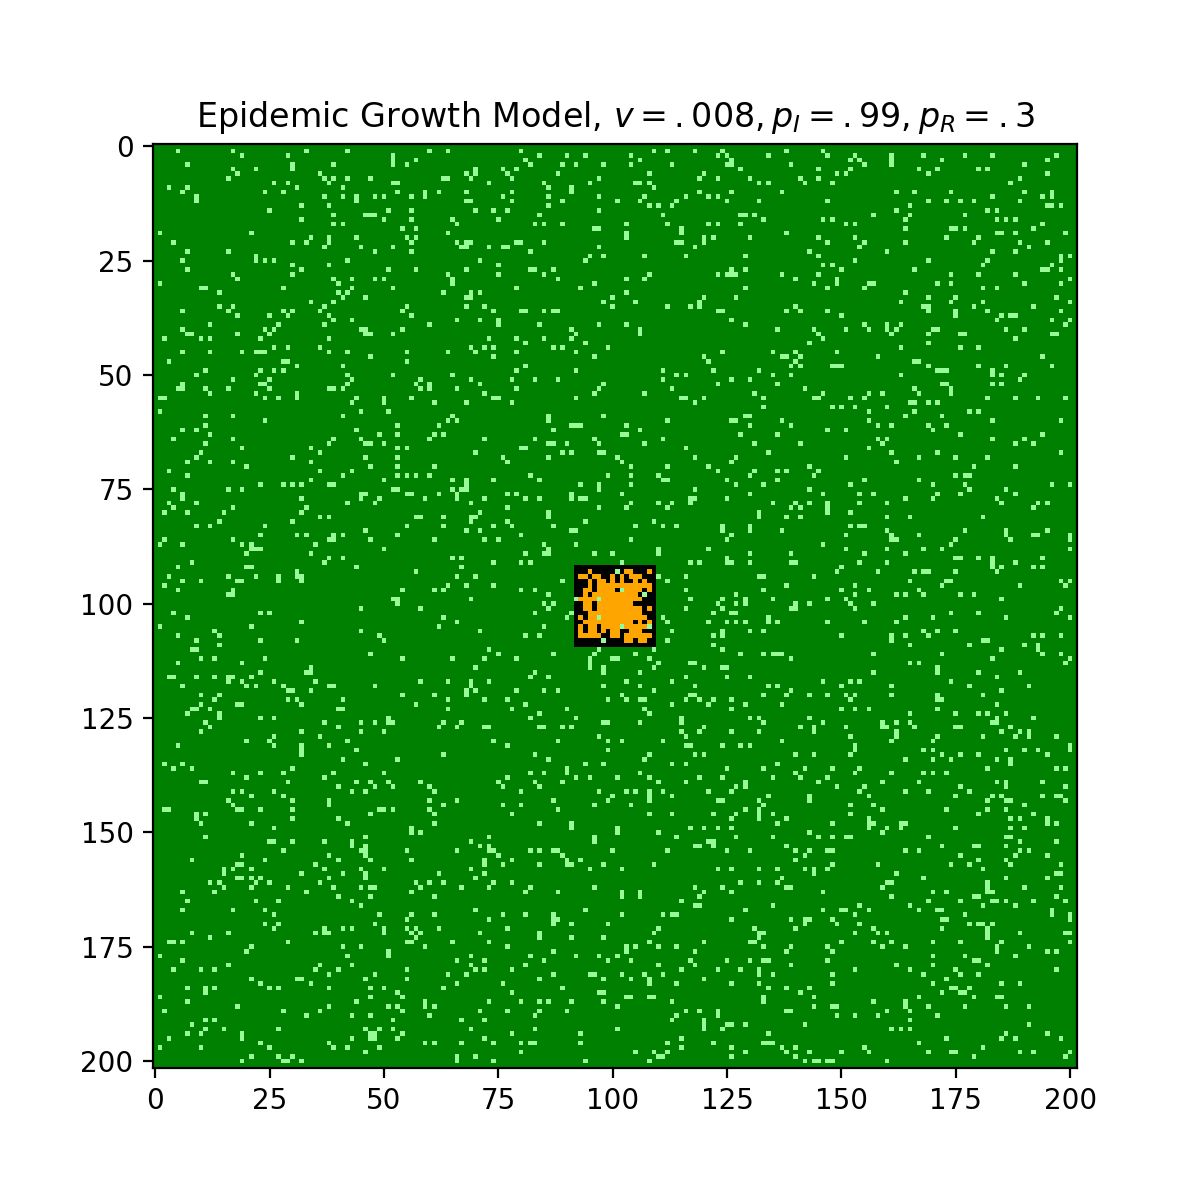

In [23]:
%matplotlib notebook

x = np.zeros((202,202), dtype = int)
x[99:103,99:103]=1
fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Epidemic Growth Model, $v=.008, p_I=.99, p_R=.3$")
cmap = colors.ListedColormap(['palegreen', 'green', 'black', 'orange'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def animate(i):
    global x

    x=vaccp(.008,x) # incorporating the vaccine function
    x=epidemic(x,pi=.99,pr=.3) # incorporating our epidemic function into the animation code
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=animate,  interval=300, blit=True, repeat=False)
plt.show()

With a $v$ of .008, that is just low enough to the point where the disease spreads througout the entire grid. It takes quite a while for the code to run.

Traceback (most recent call last):
  File "C:\Users\AEG00\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\AEG00\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


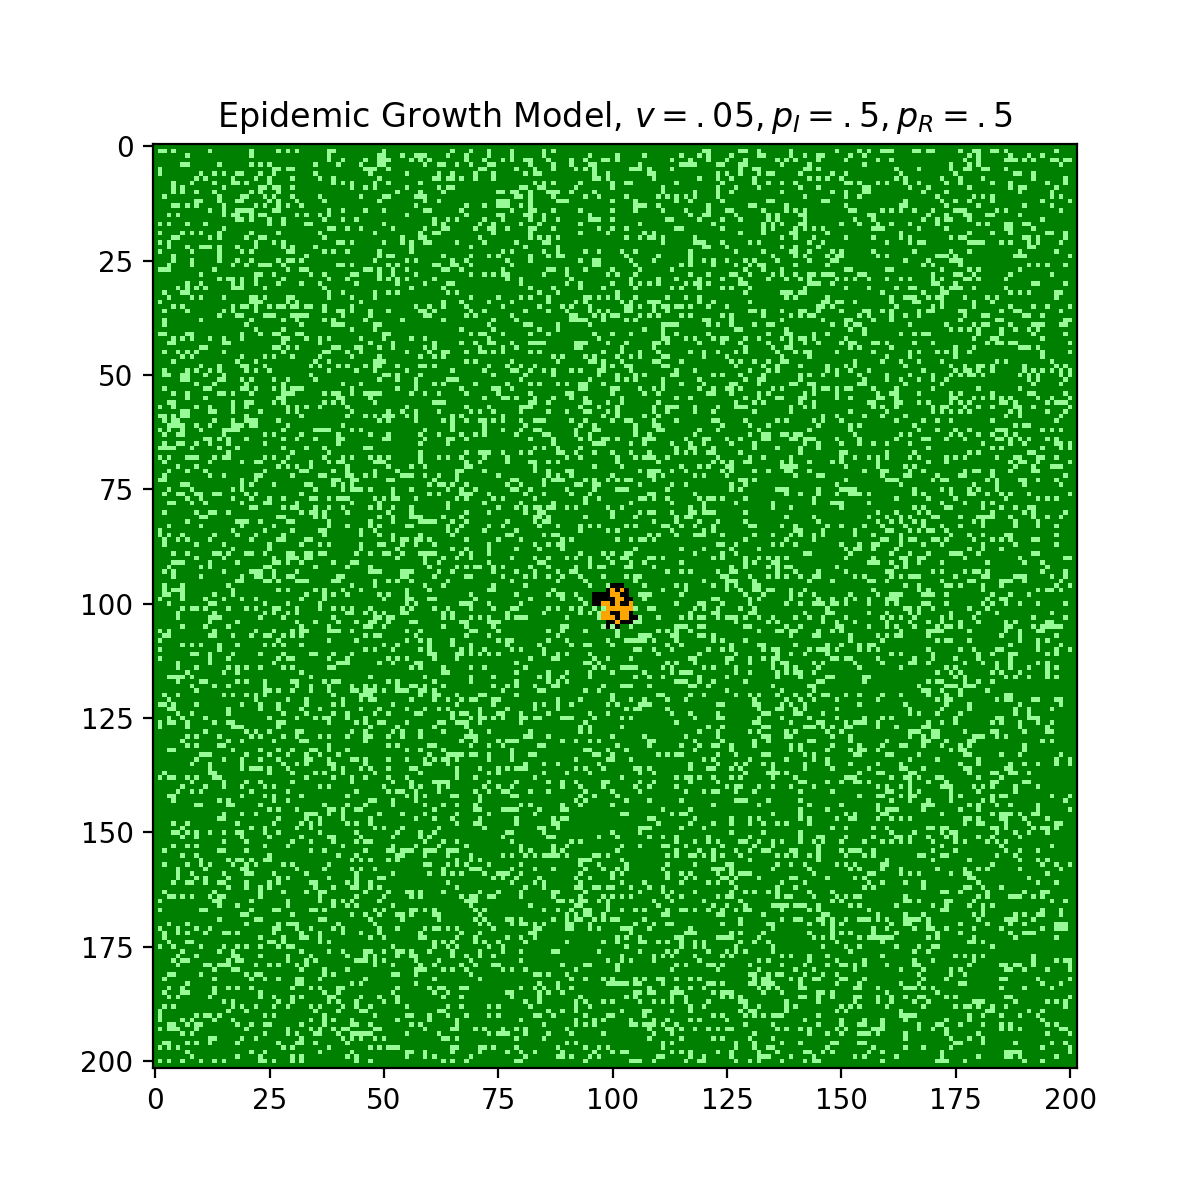

In [24]:
%matplotlib notebook

x = np.zeros((202,202), dtype = int)
x[99:103,99:103]=1
fig = plt.figure(figsize = (6,6))
ax = plt.subplot(111)
plt.title("Epidemic Growth Model, $v=.05, p_I=.5, p_R=.5$")
cmap = colors.ListedColormap(['palegreen', 'green', 'black', 'orange'])
im = ax.imshow(x, cmap = cmap, vmin = -1, vmax = 2)


def animate(i):
    global x

    x=vaccp(.05,x) # incorporating the vaccine function
    x=epidemic(x,pi=.5,pr=.5) # incorporating our epidemic function into the animation code
    im.set_data(x)
    return im


anim = FuncAnimation(fig=fig, func=animate,  interval=300, blit=True, repeat=False)
plt.show()

## $\text{Conclusion}$

In summary, we have made an `epidemic` function which takes the grid setup and returns the states of the cells over the next given number of days. We have experimented with different values of $p_I$ and $p_R$ and saw that high values for $p_I$ produce plots with a more "square" or uniform spread of the disease. In addition, high probability of infection combined with a low probability of recovery of course yields a very fast spread of the disease. We have implemented this function into the given animation code to see what the spread looks like over several days, and we have seen how different $p_I$ and $p_R$ values affect the animation and what the spread of the disease looks like. We then produced a vaccine and put it into a function as `vaccp` which takes a percentage of cells being vaccinated each day, $p_I$ and $p_R$ and we have incorporated it into the animation function to see how different $v$ values affect the spread of the disease. 